### Monitorización de la deriva

En este notebook se refleja el análisis del dataset de las predicciones

#### Importamos librerías necesarias

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Cargamos los datos de forecast y las observaciones que hemos usado para entrenamiento

In [47]:
df_observ = pd.read_parquet("../clean/df_definitivo.parquet")

# eliminamos repetidas, columnas que no participan en el modelo
df_observ.drop(columns=['Temperatura', 'wspd'], inplace=True) 

df_forecast = pd.read_csv('./clean/forecast_merged.csv')
#df_forecast.drop_duplicates(['anio', 'mes', 'dia', 'hora'], inplace=True)

##### Diferencia en tamaño (forecast tiene una columna más - la antelación de la predicción)

In [48]:
df_observ.shape, df_forecast.shape

((12810, 36), (76, 37))

Vemos que la diferencia entre los dos conjuntos es de más de 30 veces. Cogemos una muestra del mismo tamaño que los datos forecast para tener condiciones un poco más igualadas


In [49]:
df_observ_mini = df_observ.sample(n=df_forecast.shape[0])
df_observ_mini.shape

(76, 36)

## Distribución variable respuesta

Text(0.5, 0.98, 'Distribución de las olas')

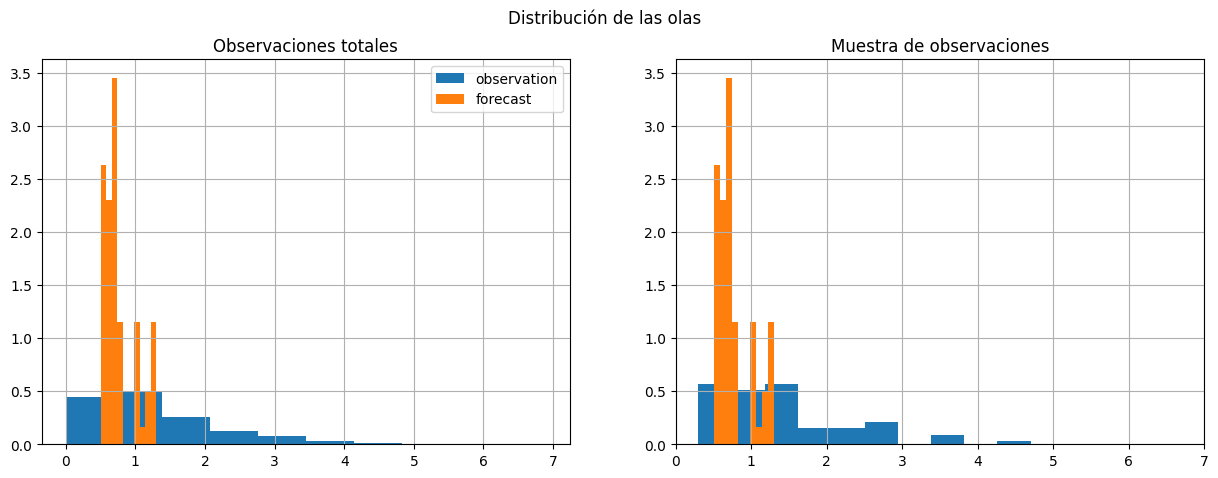

In [50]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
df_observ.AlturaOlas.hist(density=True, ax=axs[0], label='observation')
df_forecast.AlturaOlas.hist(density=True, ax=axs[0], label='forecast')
axs[0].legend()
axs[0].set_title('Observaciones totales')
axs[0].set_xticks([i for i in range(0,8)])

df_observ_mini.AlturaOlas.hist(density=True, ax=axs[1])
df_forecast.AlturaOlas.hist(density=True, ax=axs[1])
axs[1].set_title('Muestra de observaciones')
axs[1].set_xticks([i for i in range(0,8)])
fig.suptitle('Distribución de las olas')
